In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train= pd.read_csv('/content/Train.csv')
test= pd.read_csv('/content/Test.csv')
sample= pd.read_csv('/content/Submission.csv')

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6605 entries, 0 to 6604
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6605 non-null   int64  
 1   age       6605 non-null   float64
 2   death     6605 non-null   int64  
 3   sex       6605 non-null   object 
 4   hospdead  6605 non-null   int64  
 5   slos      6605 non-null   int64  
 6   d.time    6605 non-null   int64  
 7   dzgroup   6605 non-null   object 
 8   dzclass   6605 non-null   object 
 9   num.co    6605 non-null   int64  
 10  edu       5442 non-null   float64
 11  income    6605 non-null   int64  
 12  scoma     6604 non-null   float64
 13  charges   6507 non-null   float64
 14  totcst    6160 non-null   float64
 15  totmcst   4495 non-null   float64
 16  avtisst   6531 non-null   float64
 17  race      6576 non-null   object 
 18  sps       6604 non-null   float64
 19  apa       6604 non-null   float64
 20  surv2m    6604 non-null   floa

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [ ]:
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)

categorical_columns = train.select_dtypes(include=['object']).columns
for i in categorical_columns:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [ ]:
X=train.drop('income',axis=1)
Y=train['income']
X

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,159.894341,31.565201,2223.90562,7.00000,7.00000,<2 mo. follow-up,7.000000
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,159.894341,31.565201,2223.90562,1.16915,1.00000,<2 mo. follow-up,1.000000
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,159.894341,31.565201,2223.90562,1.00000,0.00000,<2 mo. follow-up,0.000000
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,7.416644,159.894341,31.565201,2223.90562,0.00000,0.00000,no(M2 and SIP pres),0.000000
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,159.894341,31.565201,2223.90562,1.16915,2.00000,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.000000,21.000000,2223.90562,1.16915,0.00000,<2 mo. follow-up,0.000000
6601,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.000000,49.000000,0.00000,1.16915,0.00000,<2 mo. follow-up,0.000000
6602,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.000000,60.000000,3900.00000,1.16915,1.66585,<2 mo. follow-up,2.525391
6603,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.000000,55.000000,2223.90562,1.16915,0.00000,<2 mo. follow-up,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Iterate over each column in your dataset
for column in X.columns:
# Check if the column dtype is 'object' (i.e., categorical)
  if X[column].dtype == 'object':
# Encode the values in the column and replace them with encoded values
    X[column] = label_encoder.fit_transform(X[column])

In [ ]:
train.isnull().sum()

id          0
age         0
death       0
sex         0
hospdead    0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
income      0
scoma       0
charges     0
totcst      0
totmcst     0
avtisst     0
race        0
sps         0
apa         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
pafi        0
alb         0
bili        0
crea        0
sod         0
ph          0
glucose     0
bun         0
urine       0
adlp        0
adls        0
sfdm2       0
adlsc       0
dtype: int64

In [ ]:
train.columns

Index(['id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'apa', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Iterate over each column in your dataset
for column in X.columns:
    # Check if the column dtype is 'object' (i.e., categorical)
    if X[column].dtype == 'object':
        # Encode the values in the column and replace them with encoded values
        X[column] = label_encoder.fit_transform(X[column])

Visualisation

In [ ]:
columns = train.columns

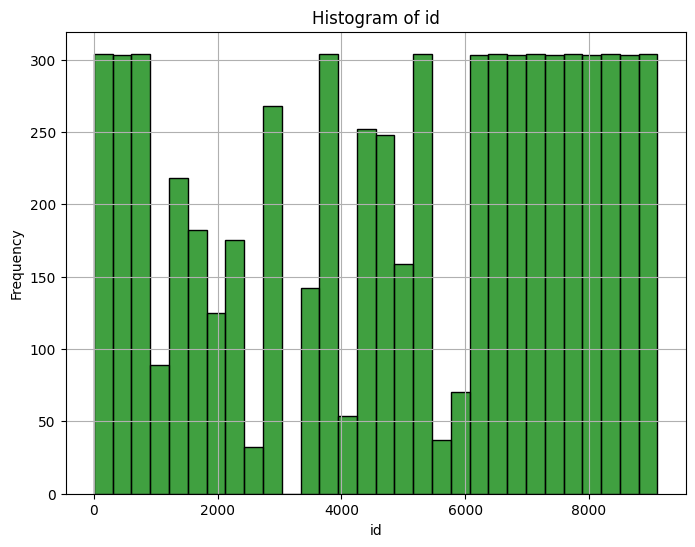

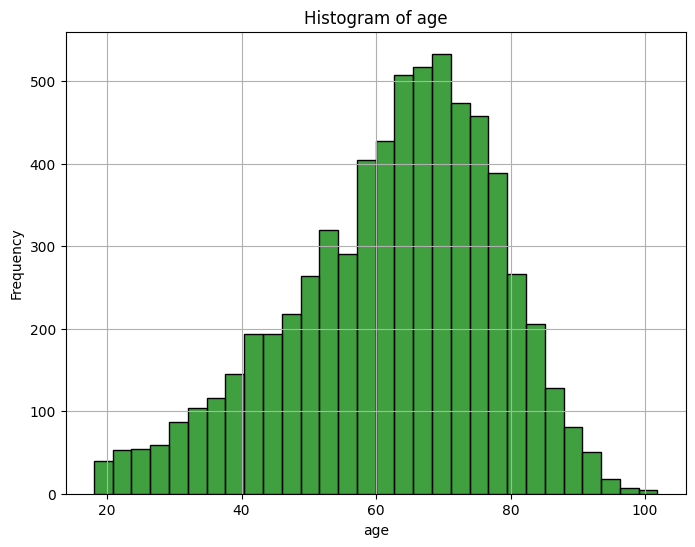

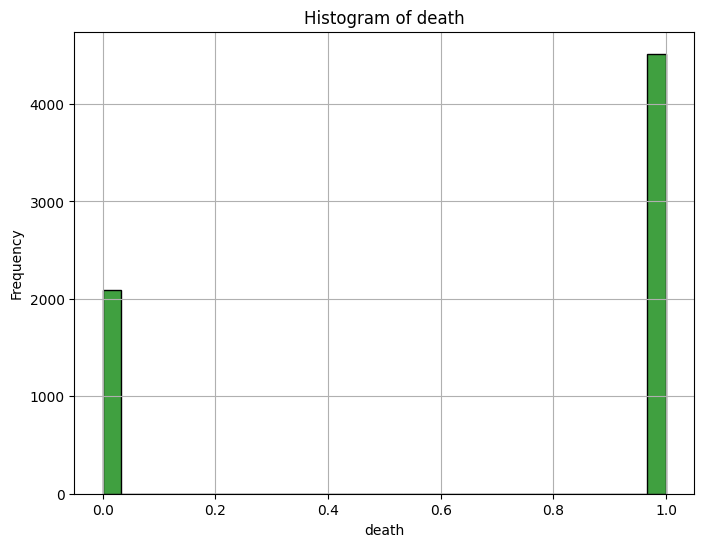

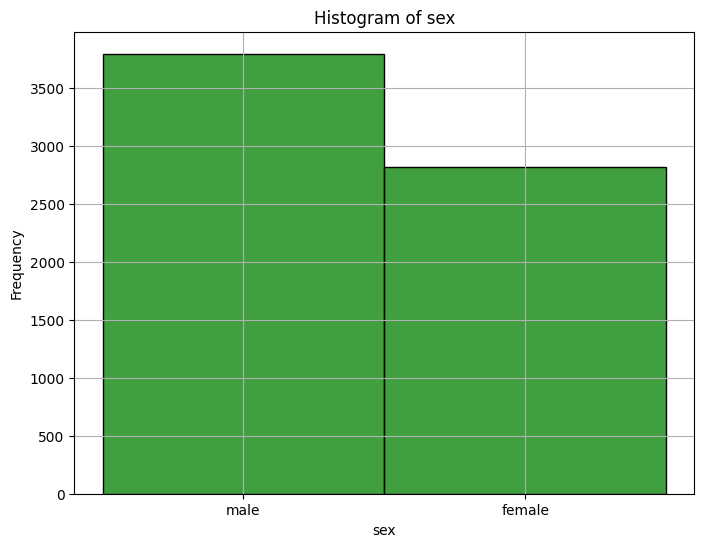

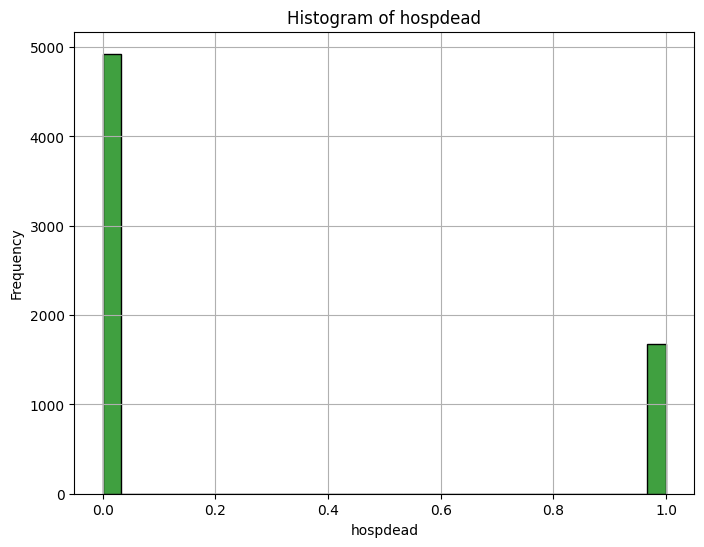

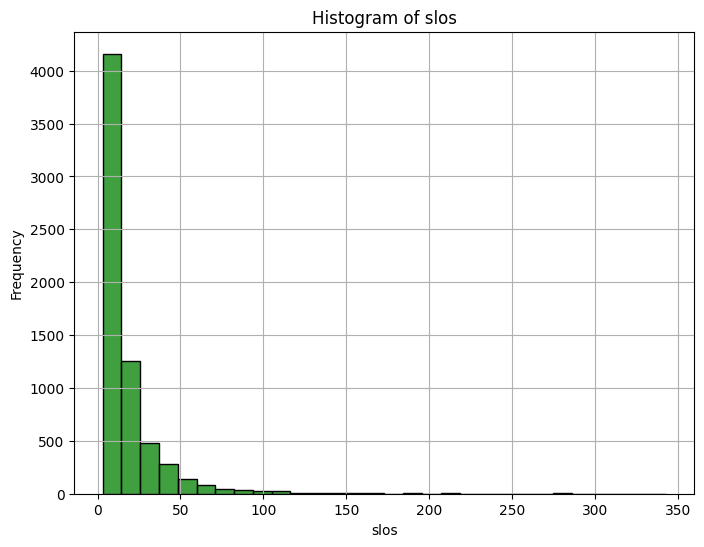

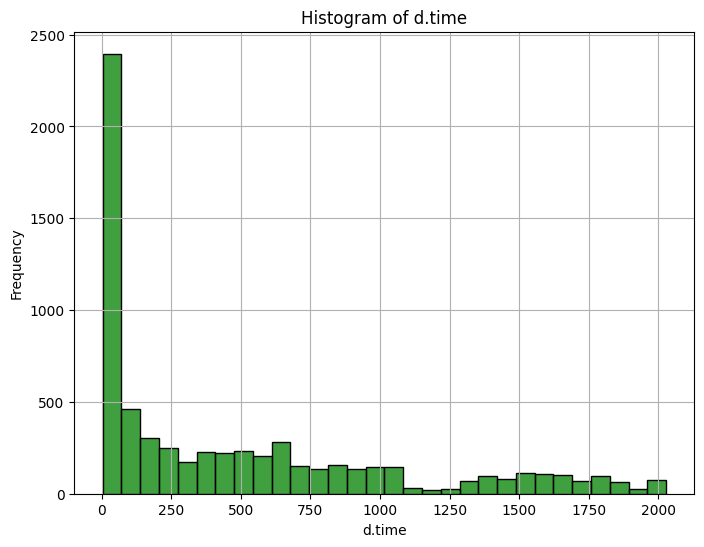

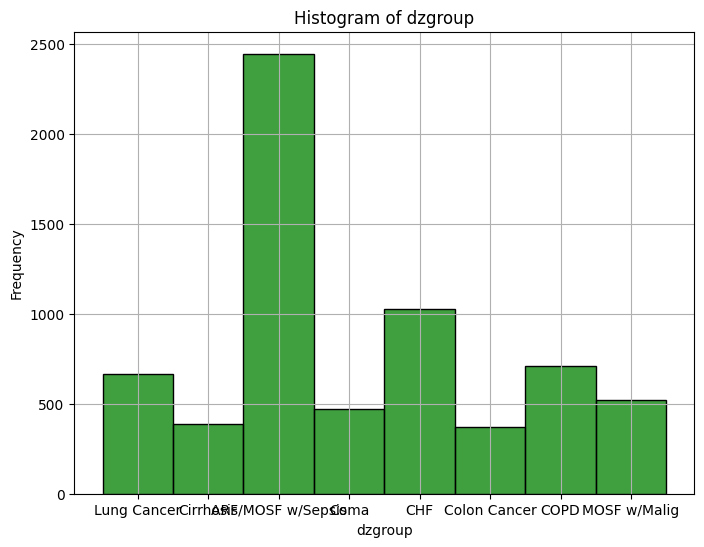

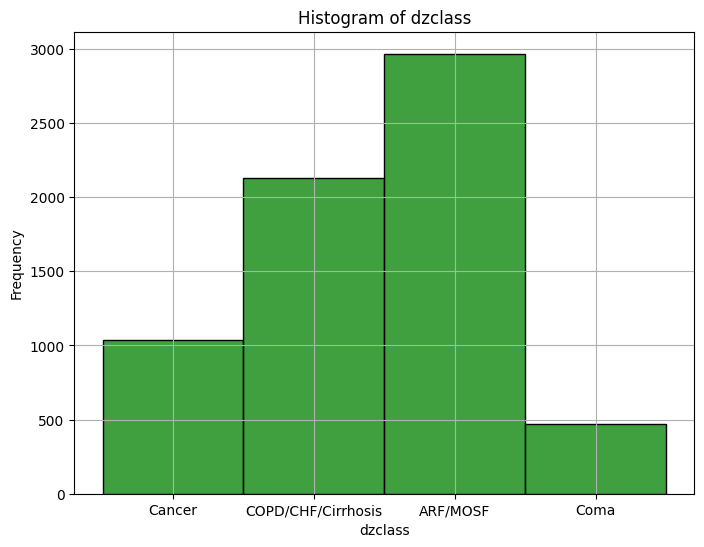

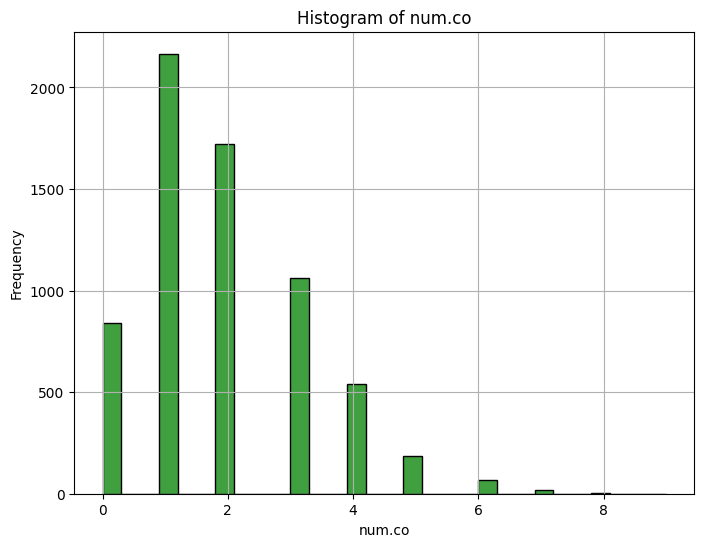

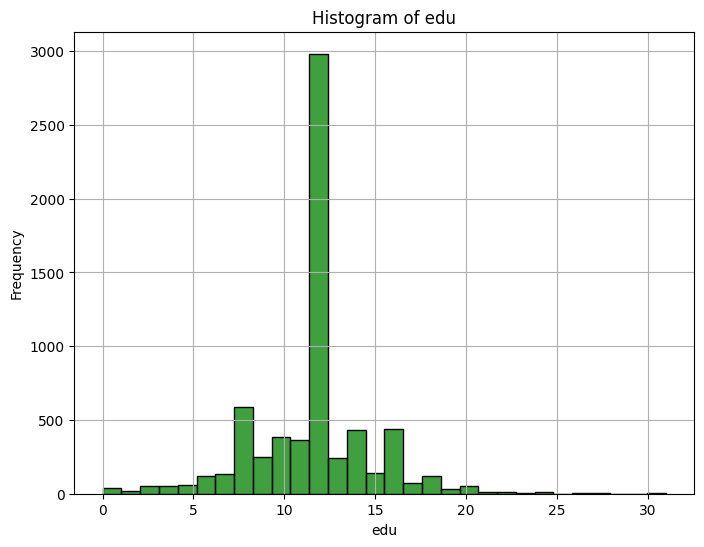

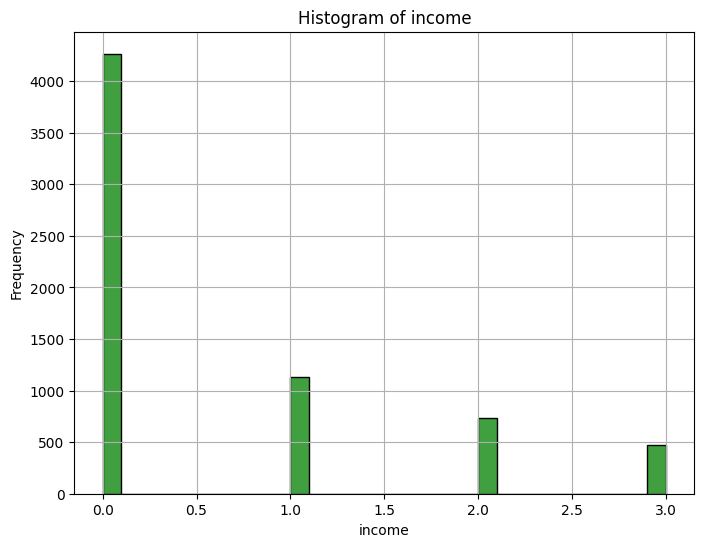

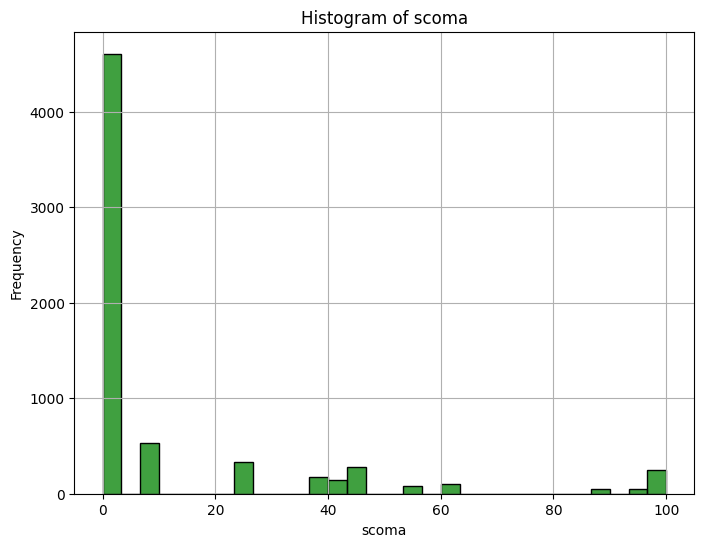

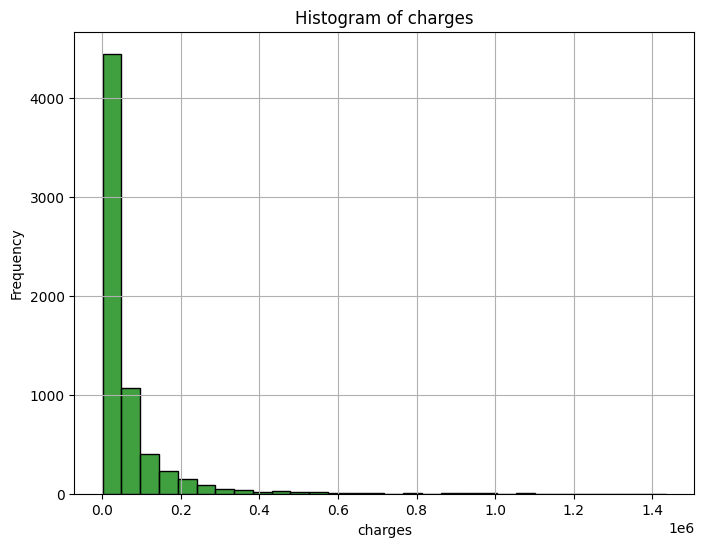

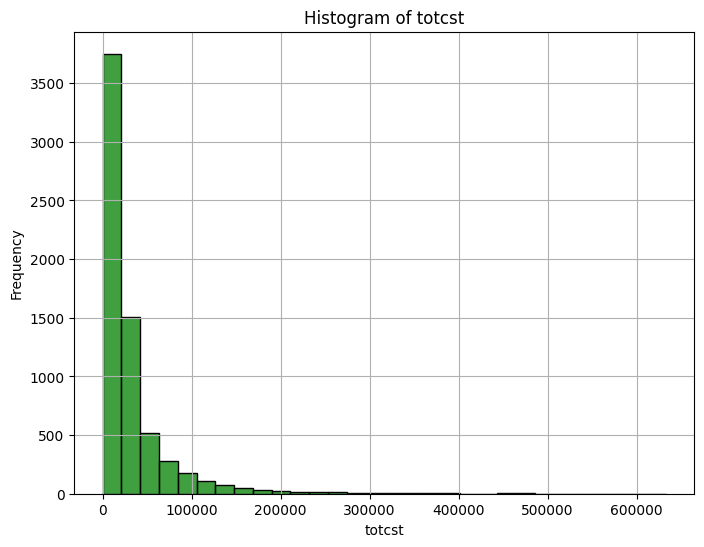

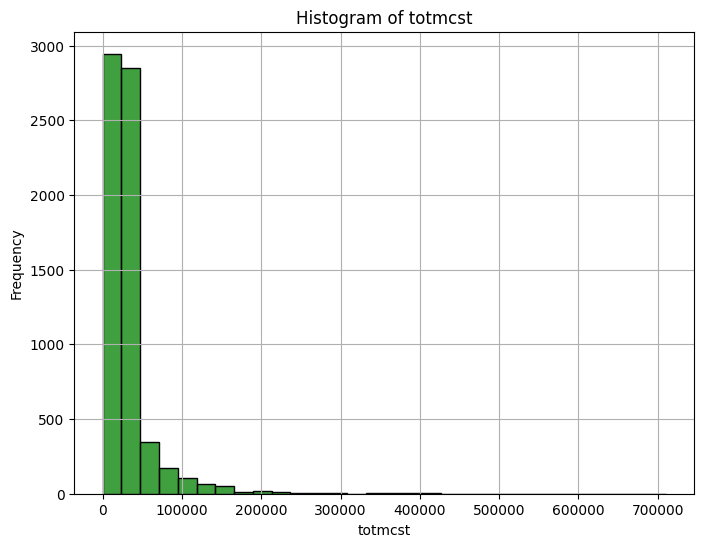

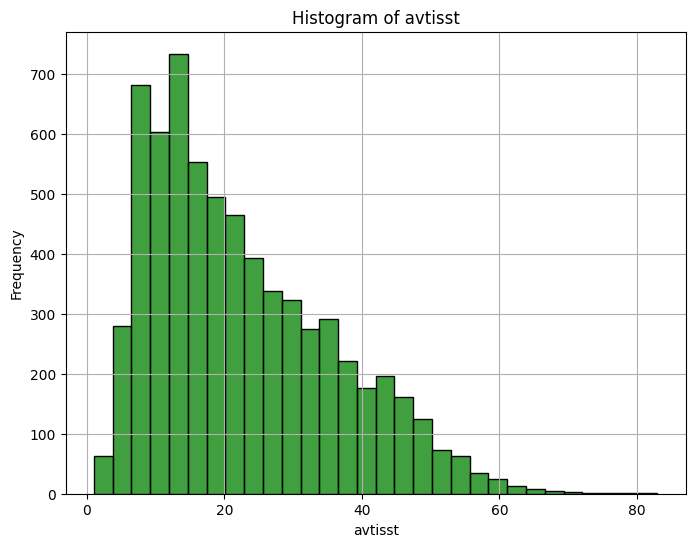

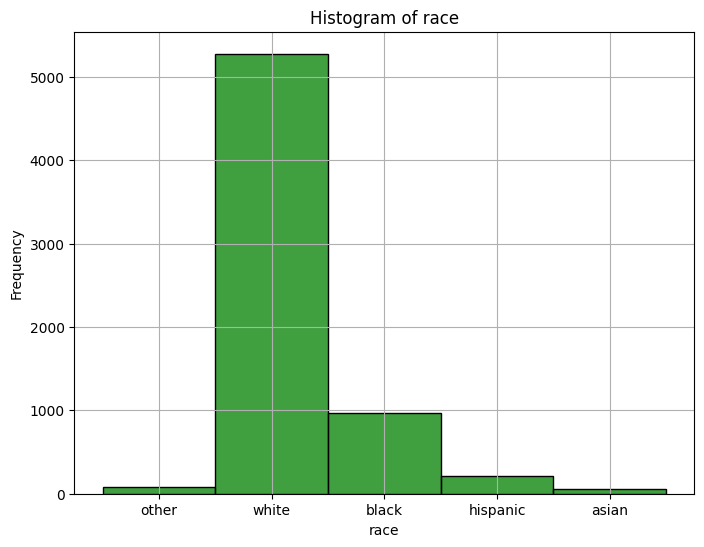

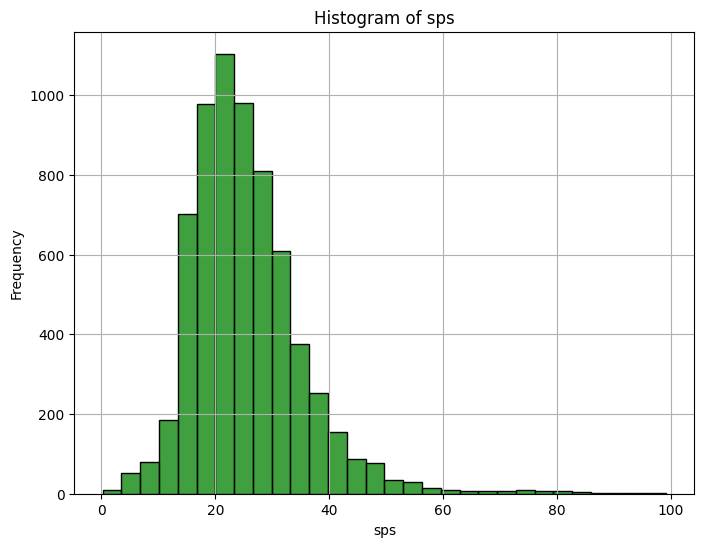

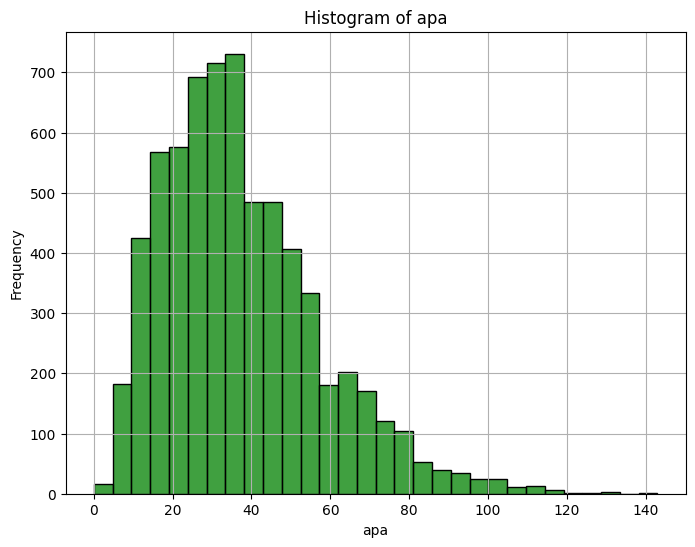

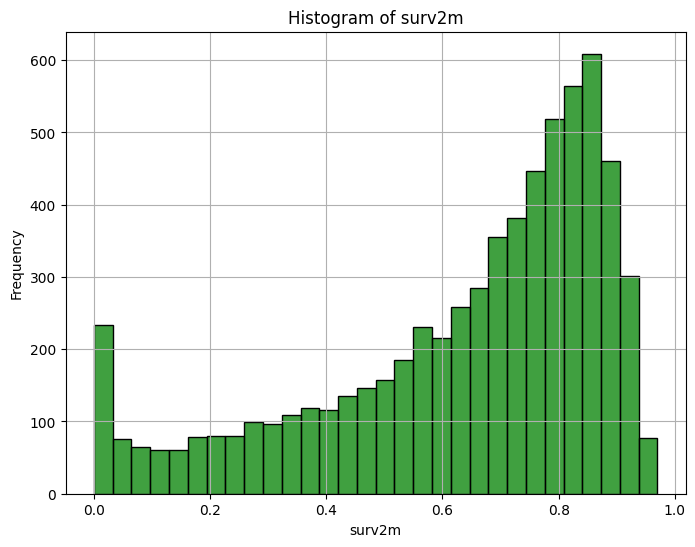

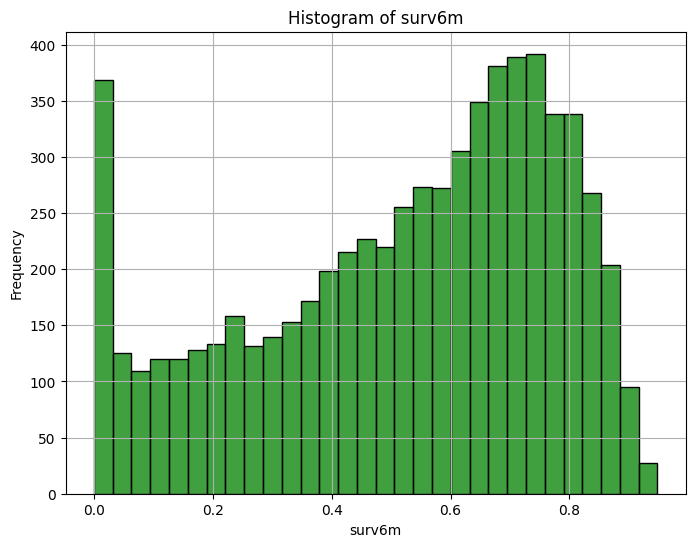

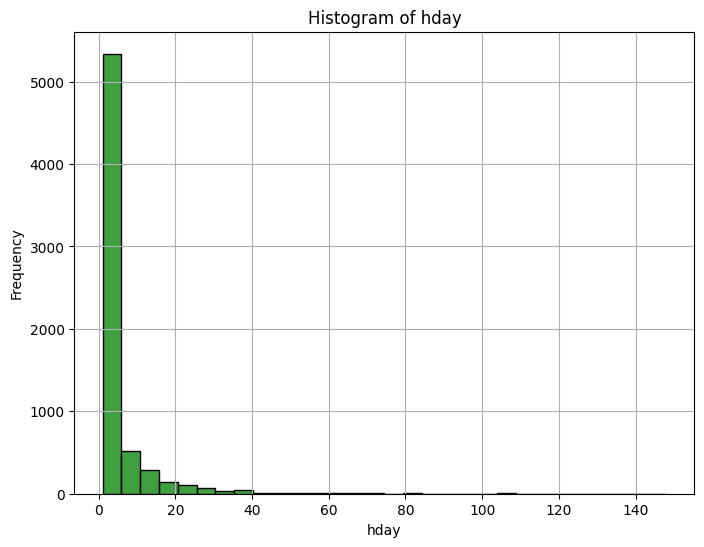

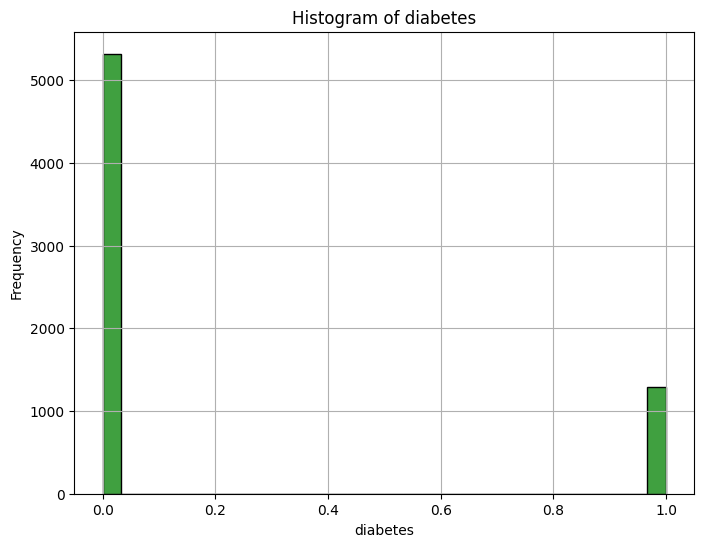

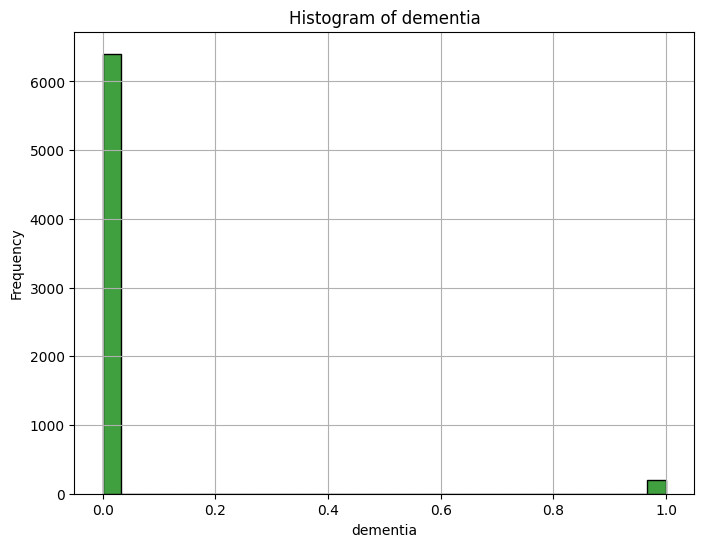

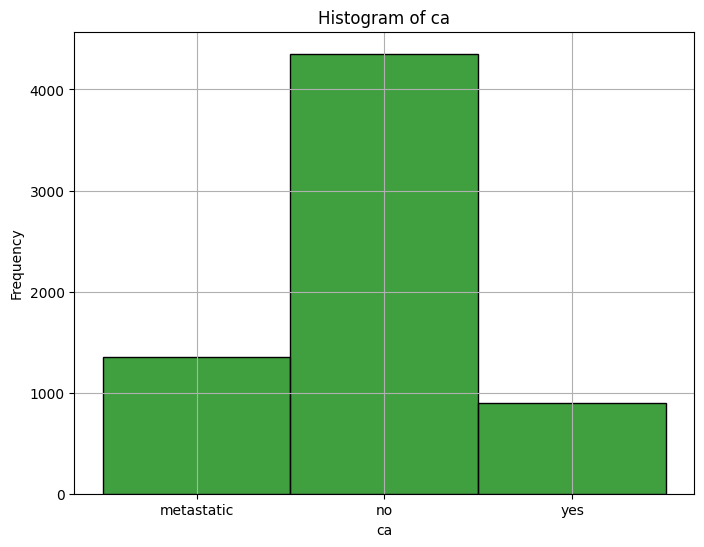

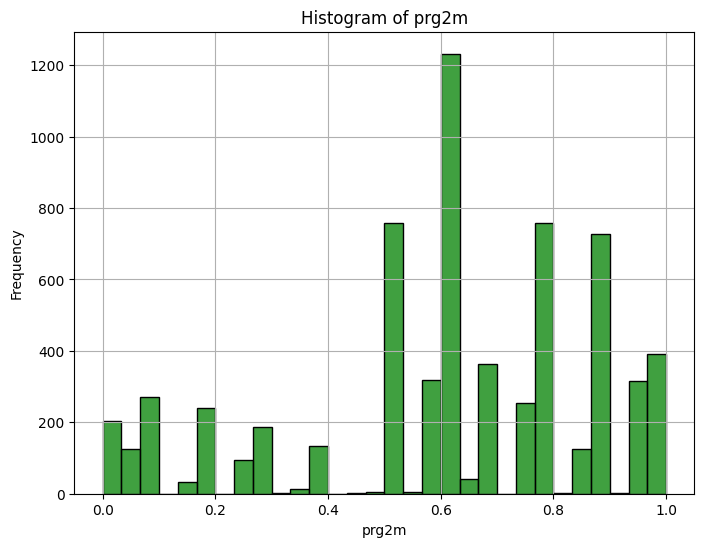

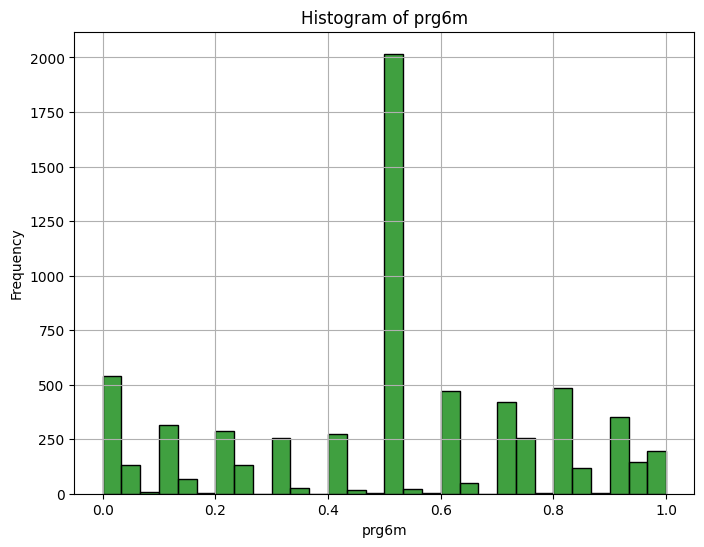

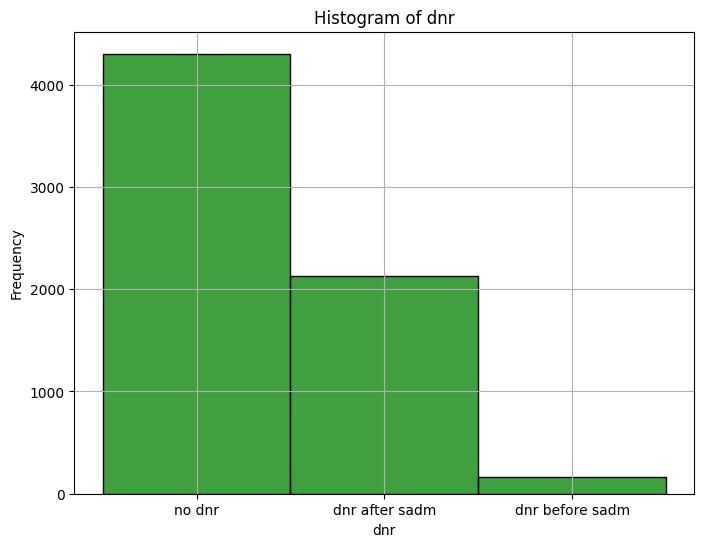

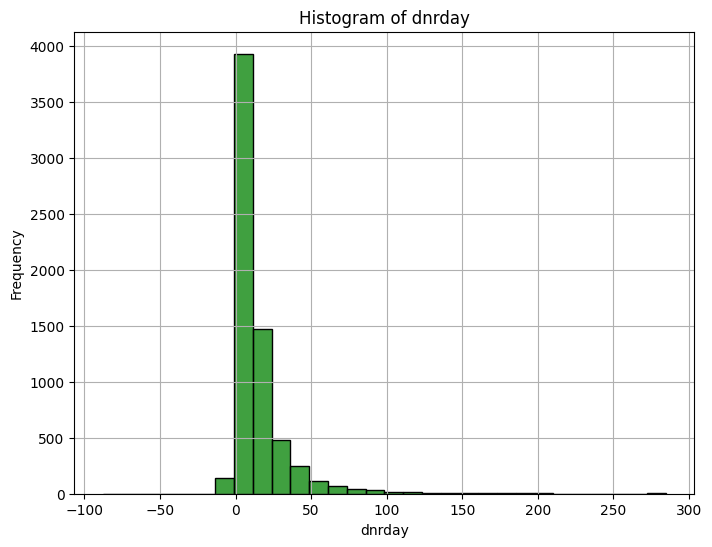

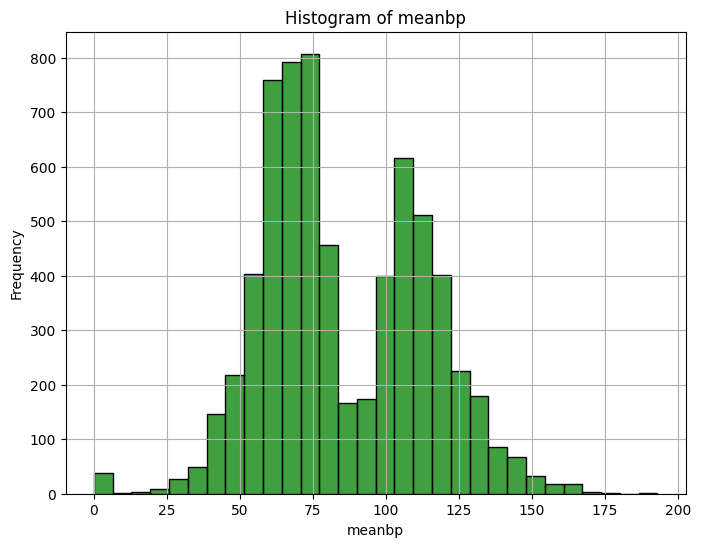

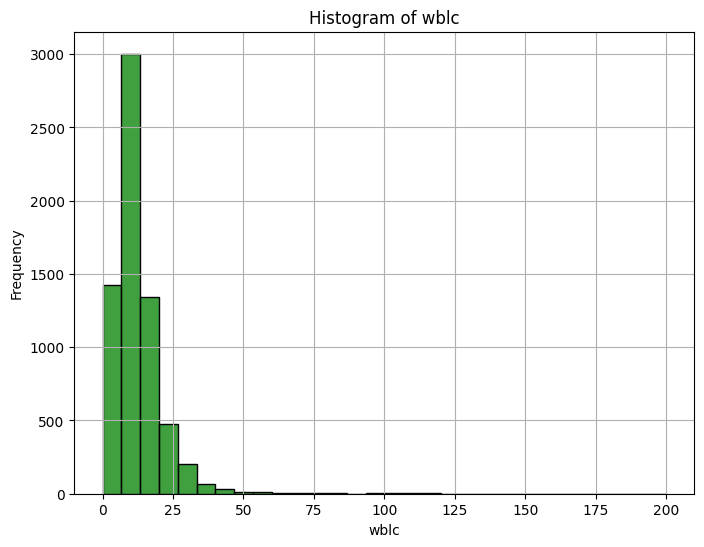

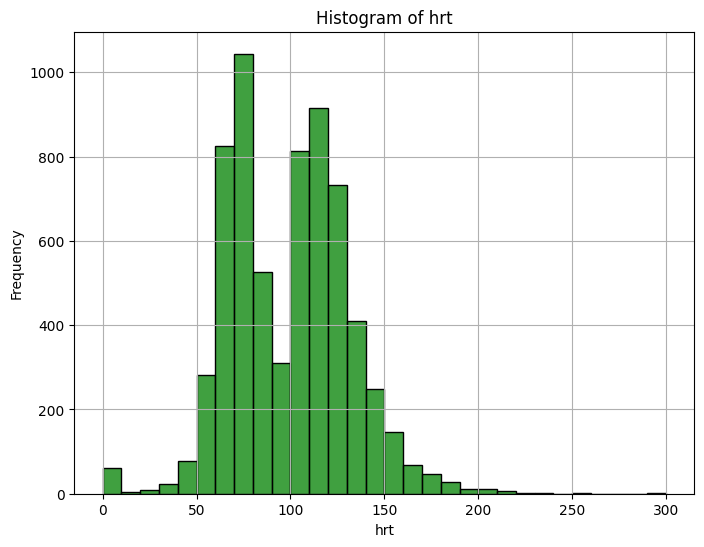

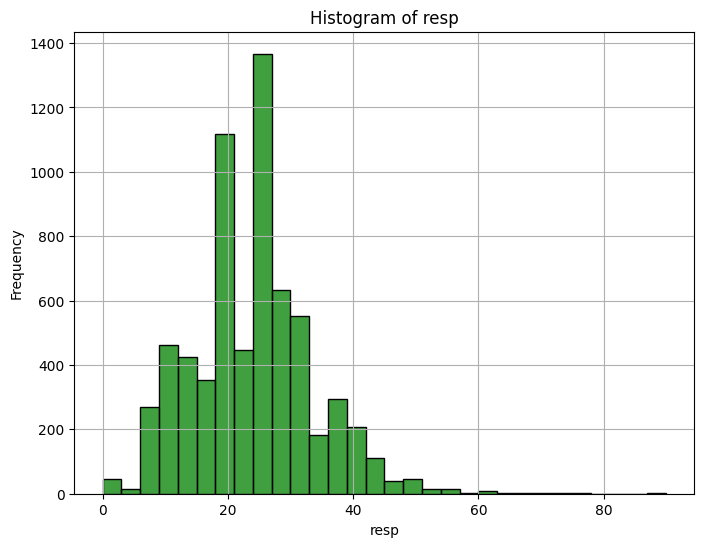

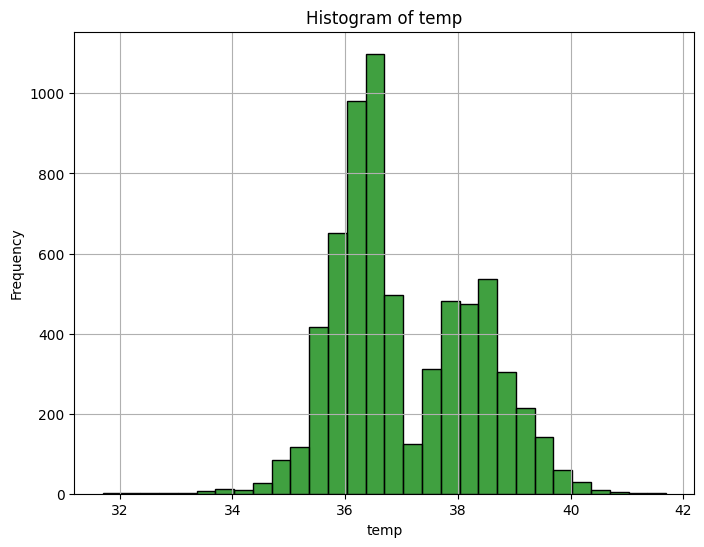

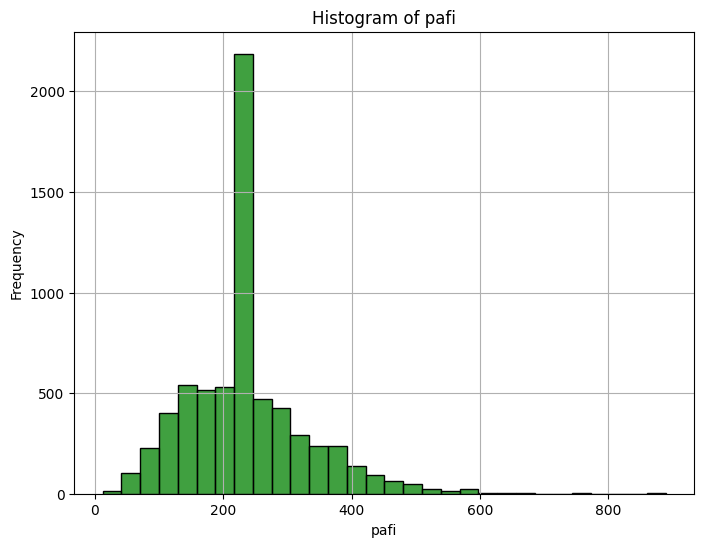

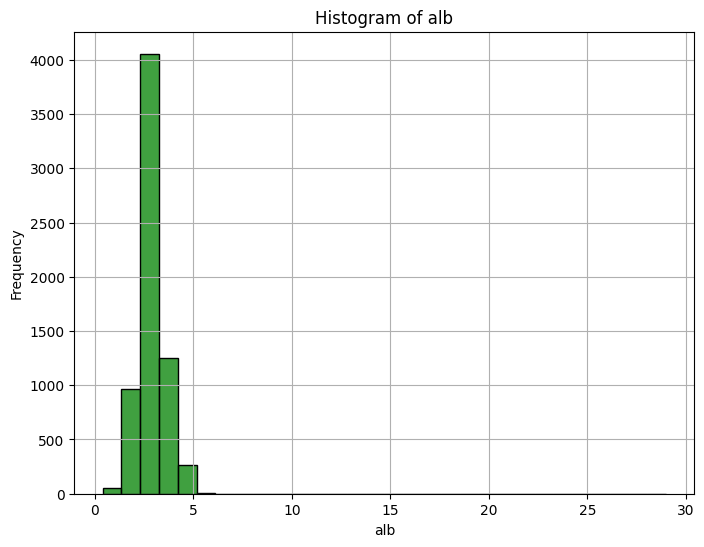

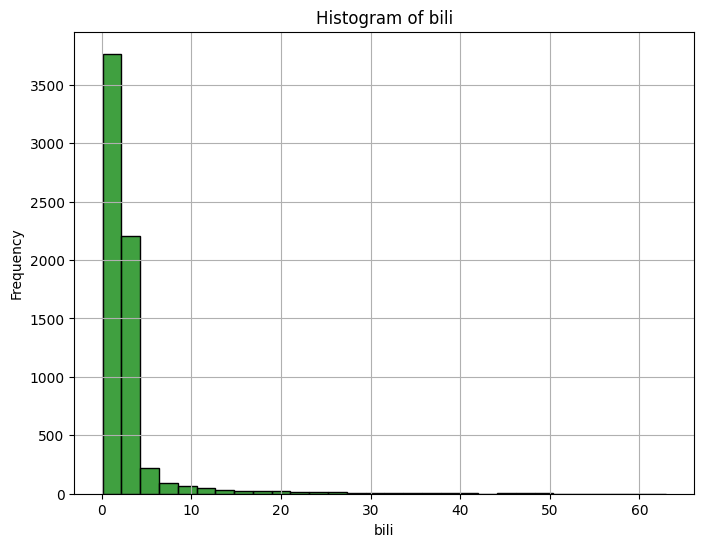

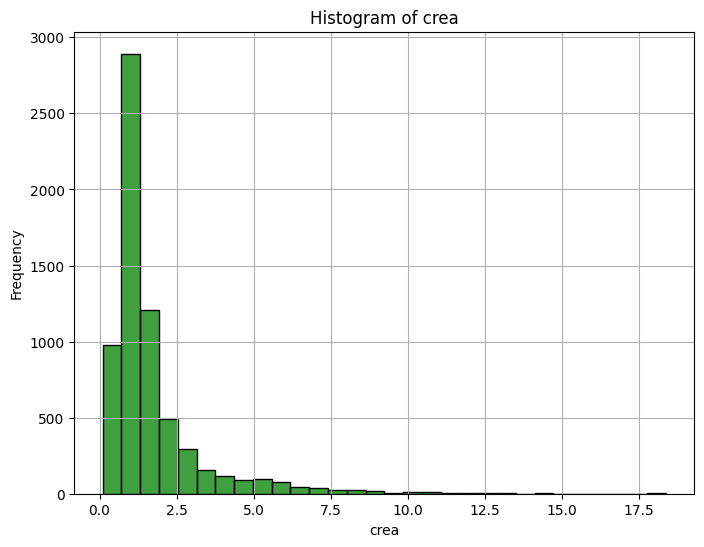

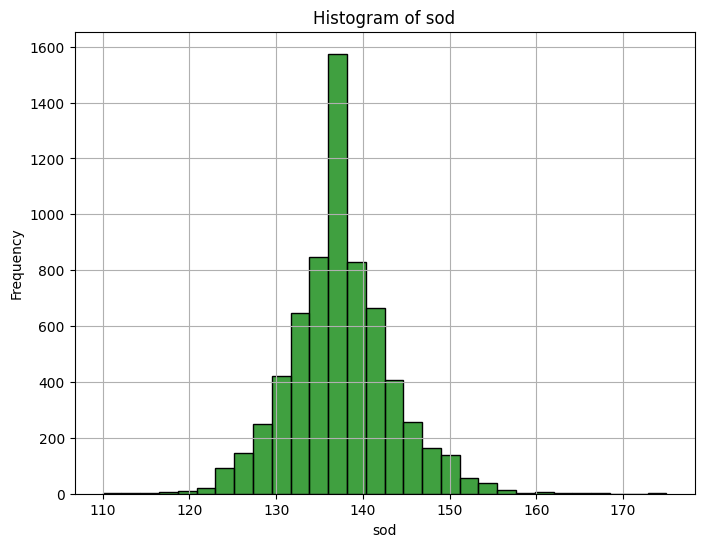

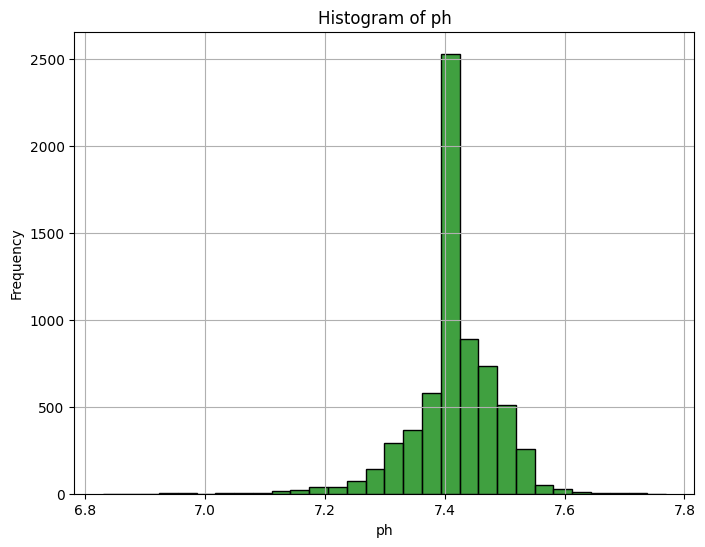

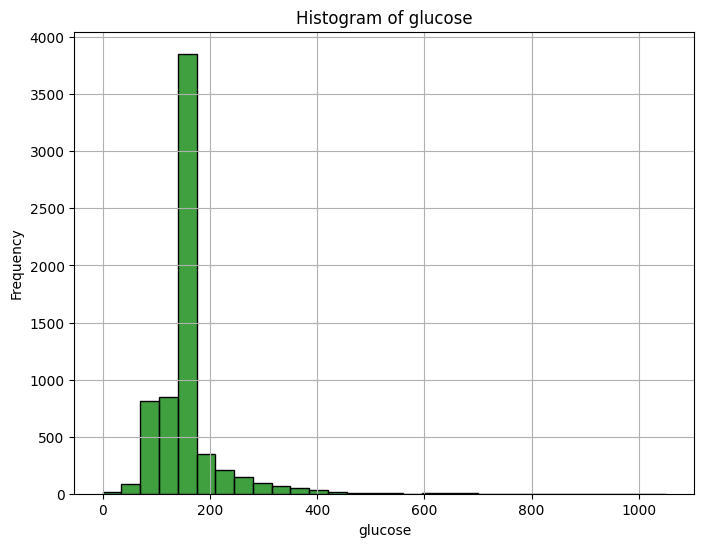

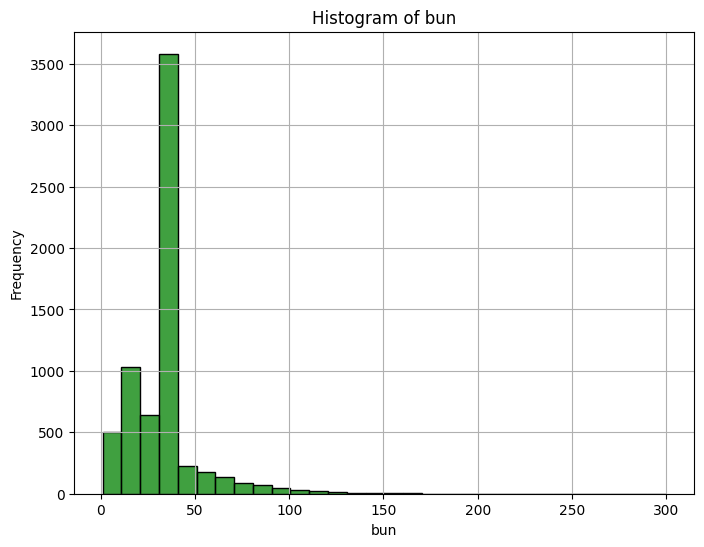

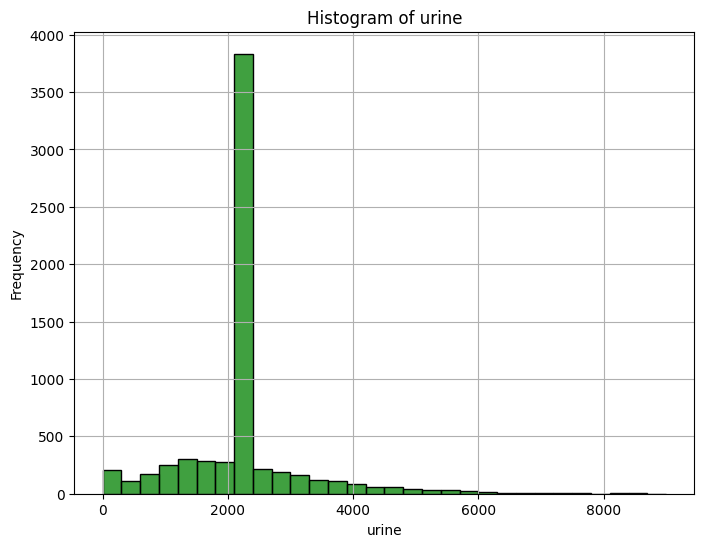

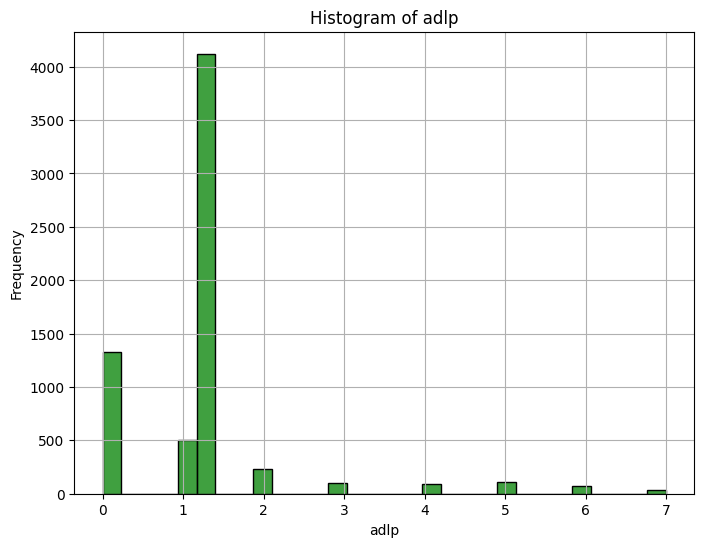

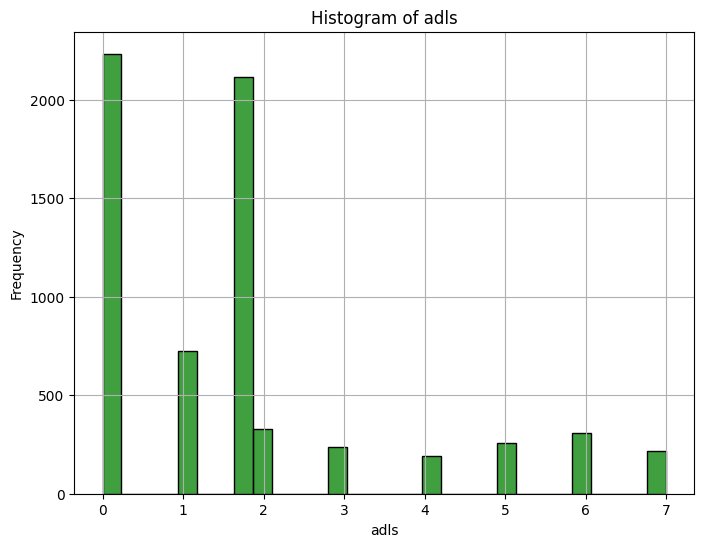

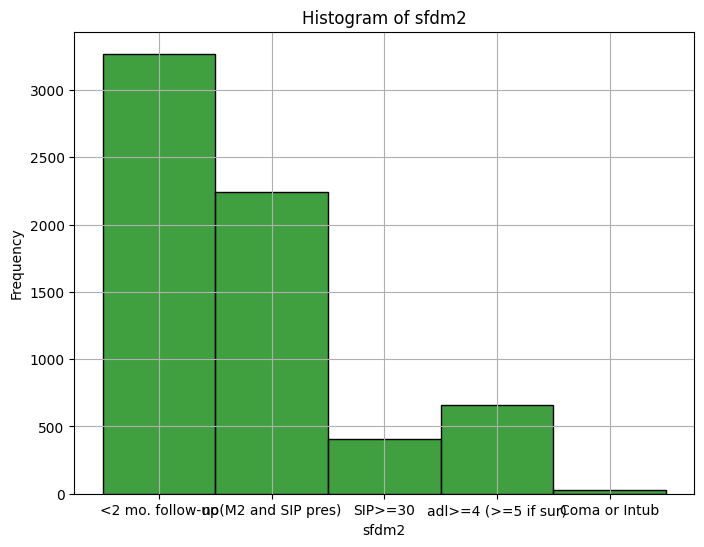

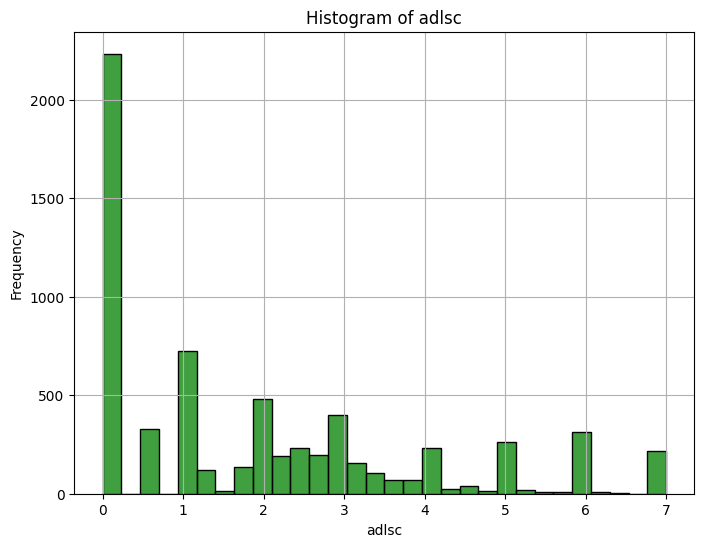

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(columns)):
    plt.figure(figsize=(8, 6))
    sns.histplot(train[columns[i]].dropna(), bins=30, kde=False, edgecolor='black',color='g')  # dropna() to handle missing values
    plt.title(f'Histogram of {columns[i]}')
    plt.xlabel(columns[i])
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
train1 = train[['age', 'death', 'hospdead', 'slos', 'd.time', 'num.co', 'edu', 'income',
       'scoma', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'apa',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'prg2m', 'prg6m',
       'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb',
       'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls',
       'adlsc']]

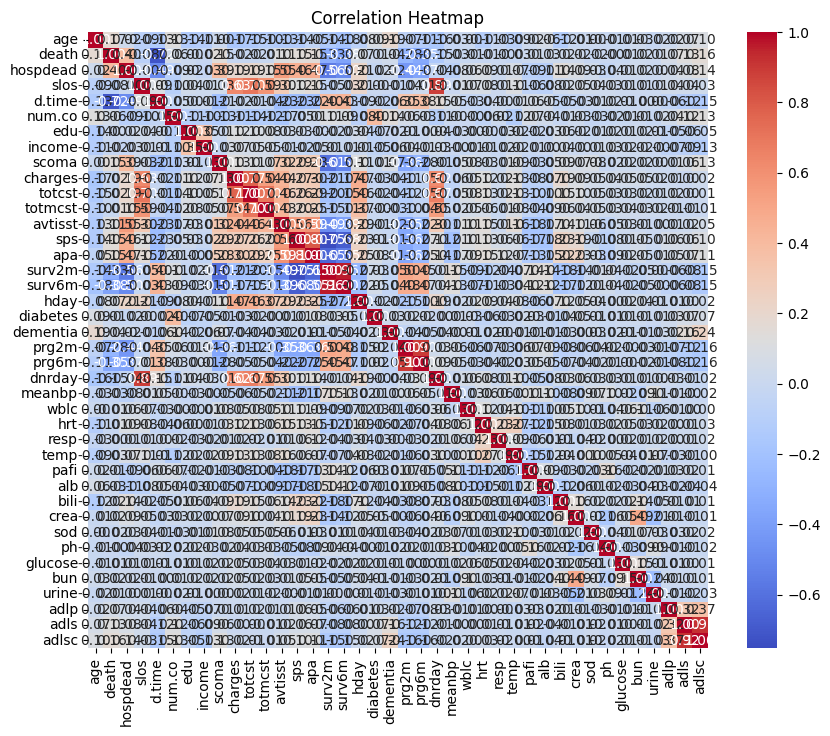

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

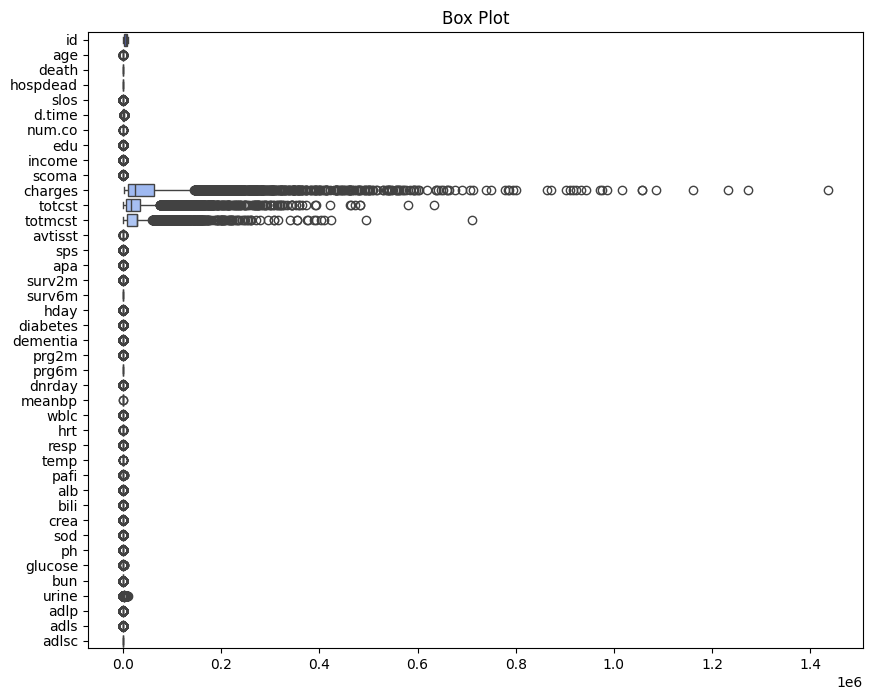

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train1.corr()


# Create a box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=train, orient='h', palette='coolwarm')
plt.title('Box Plot')
plt.show()


In [ ]:
#numerical_columns

**Data Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score #higher is good


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.48%


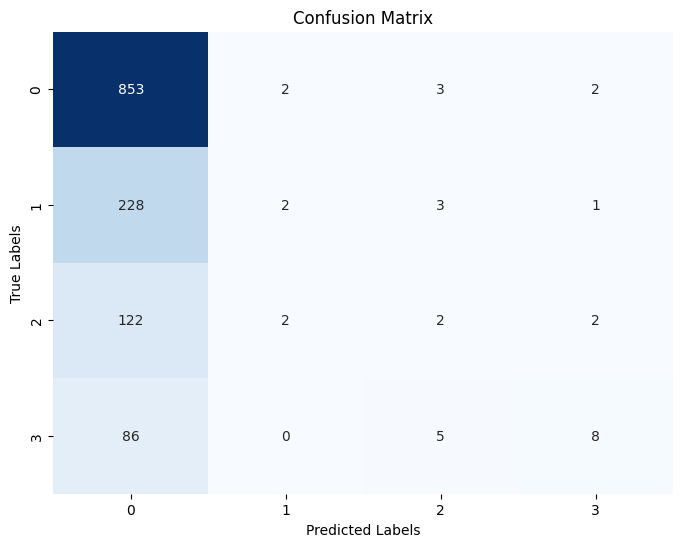

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.10%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.63%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.33%


In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 65.10%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_test.shape

(1321,)

confession matrix for classification

## **For Test Data**

In [ ]:
t=test

In [ ]:
numerical_columns = t.select_dtypes(include=['float64', 'int64']).columns
for i in numerical_columns:
    t[i].fillna(t[i].mean(), inplace=True)

categorical_columns = t.select_dtypes(include=['object']).columns
for i in categorical_columns:
    t[i].fillna(t[i].mode()[0], inplace=True)

In [ ]:
t.isnull().sum()

Unnamed: 0    0
id            0
age           0
death         0
sex           0
hospdead      0
slos          0
d.time        0
dzgroup       0
dzclass       0
num.co        0
edu           0
scoma         0
charges       0
totcst        0
totmcst       0
avtisst       0
race          0
sps           0
apa           0
surv2m        0
surv6m        0
hday          0
diabetes      0
dementia      0
ca            0
prg2m         0
prg6m         0
dnr           0
dnrday        0
meanbp        0
wblc          0
hrt           0
resp          0
temp          0
pafi          0
alb           0
bili          0
crea          0
sod           0
ph            0
glucose       0
bun           0
urine         0
adlp          0
adls          0
sfdm2         0
adlsc         0
dtype: int64

In [ ]:
t.columns

Index(['Unnamed: 0', 'id', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time',
       'dzgroup', 'dzclass', 'num.co', 'edu', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'apa', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [ ]:
t.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
t

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1001,33.67798,1,female,1,26,26,ARF/MOSF w/Sepsis,ARF/MOSF,3,...,3.899902,147,7.469727,350.000000,66.000000,3025.000000,1.12946,0.000000,<2 mo. follow-up,0.000000
1,1002,71.29095,1,male,1,5,5,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,7.500000,146,7.449219,199.000000,65.000000,753.000000,1.12946,1.564322,<2 mo. follow-up,2.475098
2,1003,59.45200,1,female,0,7,756,Colon Cancer,Cancer,1,...,1.000000,135,7.412053,159.819174,13.000000,2025.000000,0.00000,2.000000,no(M2 and SIP pres),2.000000
3,1004,74.97894,1,female,1,4,4,MOSF w/Malig,ARF/MOSF,1,...,2.299805,135,7.489258,178.000000,21.000000,18.000000,1.12946,2.000000,<2 mo. follow-up,2.000000
4,1005,75.67999,1,male,1,20,20,MOSF w/Malig,ARF/MOSF,1,...,1.599854,140,7.500000,183.000000,29.000000,3102.000000,1.12946,0.000000,<2 mo. follow-up,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,5996,72.55597,1,male,1,14,14,Lung Cancer,Cancer,2,...,0.899902,135,7.412053,159.819174,34.342845,2111.363268,0.00000,0.000000,<2 mo. follow-up,0.000000
2496,5997,68.02197,1,female,1,17,17,MOSF w/Malig,ARF/MOSF,4,...,1.099854,162,7.349609,159.819174,34.342845,2111.363268,1.12946,7.000000,<2 mo. follow-up,7.000000
2497,5998,45.98798,1,female,0,14,74,MOSF w/Malig,ARF/MOSF,1,...,7.500000,134,7.379883,159.819174,34.342845,2111.363268,2.00000,4.000000,adl>=4 (>=5 if sur),4.000000
2498,5999,81.62097,1,male,0,9,60,CHF,COPD/CHF/Cirrhosis,4,...,5.599609,133,7.412053,159.819174,34.342845,2111.363268,1.00000,1.000000,<2 mo. follow-up,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in your dataset
for column in t.columns:
    # Check if the column dtype is 'object' (i.e., categorical)
    if t[column].dtype == 'object':
        # Encode the values in the column and replace them with encoded values
        t[column] = label_encoder.fit_transform(t[column])

In [ ]:
rf.fit(X,Y)
y_pred=rf.predict(test)

In [ ]:
y_pred

array([0, 0, 3, ..., 0, 0, 3])

In [ ]:
y_pred.shape

(2500,)

In [ ]:
y_pred.shape

(2500,)

In [ ]:
sample1=sample

In [ ]:
sample1 = pd.DataFrame({
"predicted_label":y_pred
})

In [ ]:
sample1

,predicted_label
0,0
1,0
2,3
3,0
4,0
...,...
2495,0
2496,0
2497,0
2498,0


In [ ]:
sample1.to_csv('submit_2.csv',index=False)

## **ANN**

In [ ]:
# x_train = x_train.astype(np.int32)
# y_train = y_train.astype(np.int32)
# x_test = x_test.astype(np.int32)
# y_test = y_test.astype(np.int32)
# test=test.astype(np.int32)

In [ ]:
# import tensorflow
# from tensorflow import keras
# from tensorflow.keras import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Dense

In [ ]:
# model=Sequential()

In [ ]:
# model.add(Dense(10000, activation='relu',input_dim=47))
# model.add(Dense(7000, activation='relu'))
# model.add(Dense(6000, activation='relu'))
# model.add(Dense(5000, activation='relu'))
# model.add(Dense(5000, activation='relu'))
# model.add(Dense(2000, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(1, activation='linear'))

In [ ]:
# model.summary()

In [ ]:
# model.compile(loss='mse',optimizer='Adam')

In [ ]:
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

In [ ]:
# X =X.astype(np.int32)
# Y = Y.astype(np.int32)
# model.fit(X,Y,epochs=1)

In [ ]:
# model.layers[1].get_weights()

In [ ]:
# y_pred1=model.predict(test)

In [ ]:
# y_pred1

In [ ]:
# y_pred1.shape

In [ ]:
# sample2 = sample

In [ ]:
# sample2['income']=y_pred1

In [ ]:
# sample2

In [ ]:
# sample2.to_csv('submit_2.csv',index=False)